####  For the dataset named “iris” consisting of attributes such as sepal length, petal length,
#### sepal width, petal width and Species. we are performing  Divisive hierarchical clustering and plot the
#### dendrogram obtained and find the divisive coefficient.

### Importing all the needed libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# importing the dataset:

iris = pd.read_csv("C:/Users/tkjay/Desktop/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# Getting the needed information from the dataset before
# proceeding into clustering.


iris.shape

(150, 2)

In [10]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris = iris.iloc[:,[1,4]].values

#### Importing the scipy library to find out the number of clusters using dendrogram.

In [8]:
import scipy.cluster.hierarchy as sch

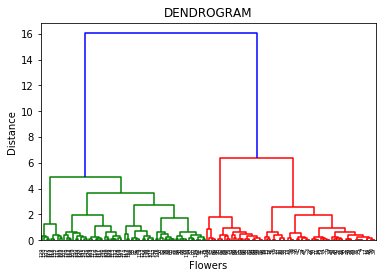

In [24]:
# Creating the dendrogram:

dendrogram = sch.dendrogram(sch.linkage(iris,method = "ward"))
plt.title('DENDROGRAM')
plt.xlabel('Flowers')
plt.ylabel('Distance')
plt.show()

In [25]:
# importing and fitting the data into hieracrhcial clustering
from sklearn.cluster import AgglomerativeClustering 

In [41]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [42]:
clustering = hc.fit_predict(iris)
clustering

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

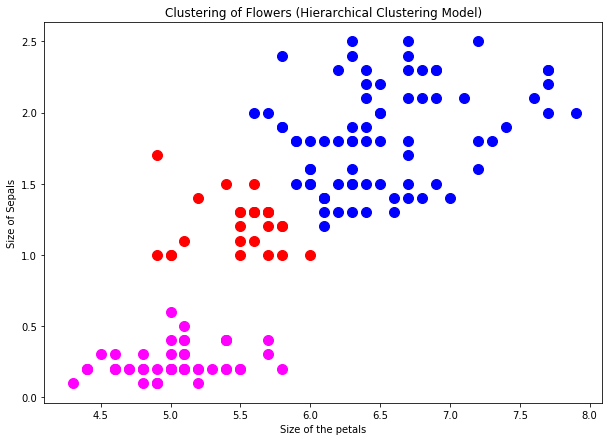

In [44]:
# Plotting the obtained predicted clustering into a graph.

plt.figure(figsize=(10, 7))
plt.scatter(iris[clustering==0, 0], iris[clustering==0, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(iris[clustering==1, 0], iris[clustering==1, 1], s=100, c='magenta', label ='Cluster 2')
plt.scatter(iris[clustering==2, 0], iris[clustering==2, 1], s=100, c='red', label ='Cluster 3')
plt.title('Clustering of Flowers (Hierarchical Clustering Model)')
plt.xlabel('Size of the petals')
plt.ylabel('Size of Sepals')
plt.show()

In [52]:
# Showing the End result to the Customer.

iris_flowers = {
    'Clusters' : ['Cluster 1 (BLUE) ','Cluster 2 (RED) ','Cluster 3 (MAGENTA) '],
    'Flower_Name': ['Iris-Certosa','Iris Versicolor','Iris Verginica']
}
df = pd.DataFrame(iris_flowers, columns = ['Clusters','Flower_Name',])

In [53]:
df

,Clusters,Flower_Name
0,Cluster 1 (BLUE),Iris-Certosa
1,Cluster 2 (RED),Iris Versicolor
2,Cluster 3 (MAGENTA),Iris Verginica


# USING K - MEANS CLUSTERING TO GROUP THE NECESSARY FEATURES.

In [29]:
# importing the necessary library.
from sklearn.cluster import KMeans

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
# Label encoding the 'Species' column.
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [18]:
iris['species']=LE.fit_transform(iris['species'])

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
x = iris.iloc[:,[0,2]]
y = iris['species']

Text(0, 0.5, 'Sepal Width')

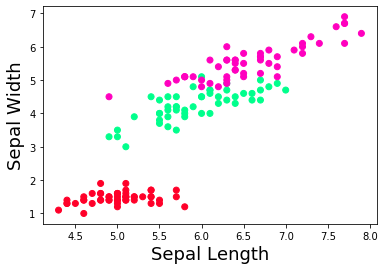

In [26]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [30]:
# Fitting the data into the k- means clustering.
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

In [31]:
centers = km.cluster_centers_
print(centers)

[[5.87413793 4.39310345]
 [5.00784314 1.49215686]
 [6.83902439 5.67804878]]


Text(0.5, 1.0, 'Predicted')

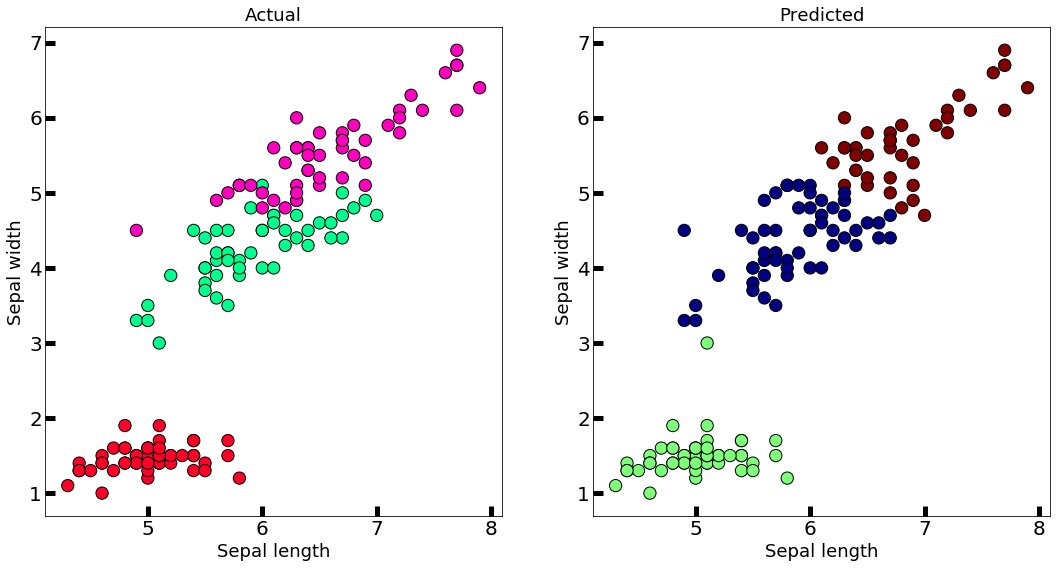

In [39]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(18,9))
axes[0].scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(x.iloc[:, 0], x.iloc[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)